# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [67]:
!pip install -r "../requirements.txt"


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [68]:
# run only onces
#import zipfile as zf
#files = zf.ZipFile("../data/train.zip", 'r')
#files.extractall('../data/raw/images')
#files.close()

In [69]:
import keras,os
import pandas as pd
from keras.models import Sequential  #as all the layers of the model will be arranged in sequence
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from keras.preprocessing.image import ImageDataGenerator # as it imports data with labels easily into the model. It has functions to rescale, rotate, zoom, etc. This class alters the data on the go while passing it to the model.
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split

In [70]:
IMAGE_FOLDER_PATH = "../data/raw/images/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 200
HEIGHT = 200

In [71]:
labels = []
for i in os.listdir(IMAGE_FOLDER_PATH):
    labels+=[i]

In [72]:
labels

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [73]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [74]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
cat    12500
dog    12500
Name: target, dtype: int64


In [75]:
fig = go.Figure(go.Bar(
            x= counts.values,
            y=counts.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)
fig.show()

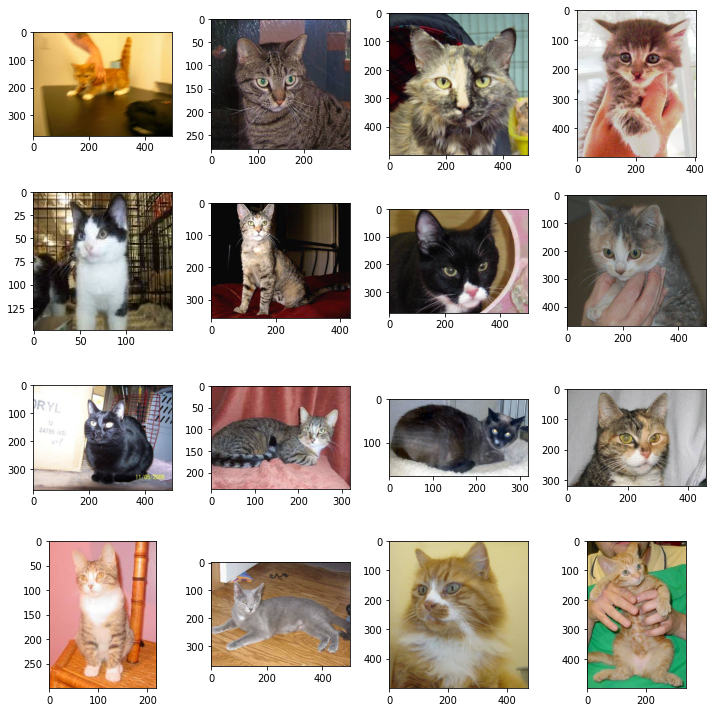

In [76]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

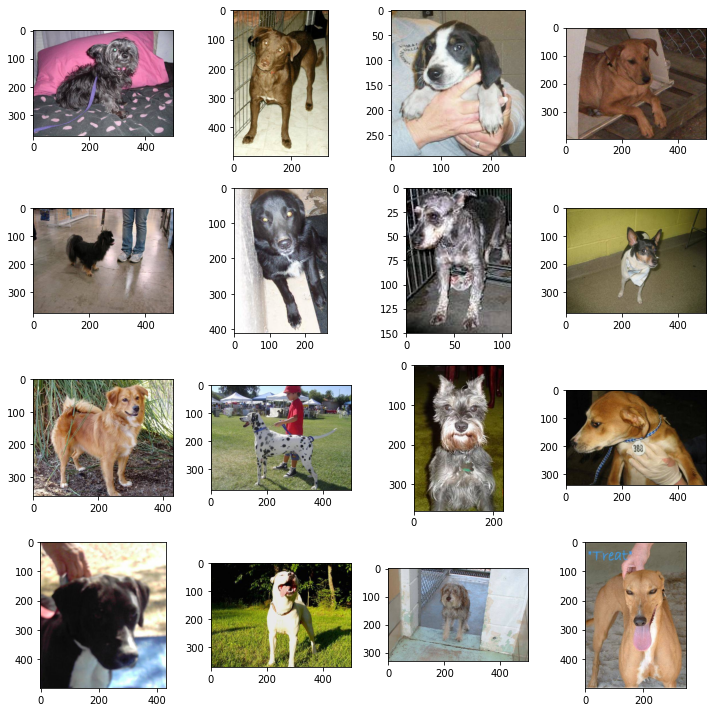

In [77]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

In [78]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [79]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

train_datagenerator = train_datagen.flow_from_dataframe(
    dataframe=dataset_train,
    x_col="image_path",
    y_col="target",
    target_size=(WIDTH, HEIGHT),
    class_mode="binary",
    batch_size=150)  

Found 20000 validated image filenames belonging to 2 classes.


In [80]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_dataframe(
    dataframe=dataset_test,
    x_col="image_path",
    y_col="target",
    target_size=(WIDTH, HEIGHT),
    class_mode="binary",
    batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


In [81]:
model = Sequential()
#→ 2 x convolution layer of 64 channel of 3x3 kernal and same padding
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), padding="same", activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', padding="same"))
#→ 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#→ 2 x convolution layer of 128 channel of 3x3 kernal and same padding
model.add(Conv2D(128, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), padding="same", activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', padding="same"))
#→ 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#→ 3 x convolution layer of 256 channel of 3x3 kernal and same padding
model.add(Conv2D(256, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), padding="same", activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation = 'relu', padding="same"))
model.add(Conv2D(256, kernel_size=(3,3), activation = 'relu', padding="same"))
#→ 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding
model.add(Conv2D(512, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), padding="same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', padding="same"))
model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', padding="same"))
#→ 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding
model.add(Conv2D(512, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), padding="same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', padding="same"))
model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', padding="same"))
#→ 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#1 x Dense layer of 4096 units
model.add(Dense(4096, activation='relu'))
#→ 1 x Dense layer of 4096 units
model.add(Dense(4096, activation='relu'))
#→ 1 x Dense Softmax layer of 2 units
model.add(Dense(2, activation='softmax'))

In [82]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 conv2d_28 (Conv2D)          (None, 100, 100, 128)     147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                 

In [84]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "vgg16_1.h5", 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='auto', 
    period=1)

early = EarlyStopping(
    monitor='val_acc', 
    min_delta=0, 
    patience=20, 
    verbose=1, 
    mode='auto')

hist = model.fit_generator(
    steps_per_epoch=100,
    generator=dataset_train, 
    validation_data=dataset_test, 
    validation_steps=10,
    epochs=100,
    callbacks=[checkpoint,early])

/tmp/ipykernel_2010/184846149.py:19: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
img = image.load_img("../data/raw/images/cat.0.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')